In [11]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.6.0'

In [12]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



#Part-1
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

#Part-2
import h5py
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from keras.layers import BatchNormalization, Dropout
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


In [3]:
#Connecting to Gdrive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Part-1**

## 1.1. Import data.

In [4]:
#Importing the csv file
Part1 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/8. Deep Learning/Project/Part- 1 - Signal.csv')
Part1.shape

(1599, 12)

- Data Set has 1599 records only, This is too less to train ML model

In [5]:
#For safer side, lets have backup
df = Part1.copy()
df.head(10)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
#Target class unique values
df['Signal_Strength'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

- Signal strength ranges from 3-8 
- Few count with high & low values 
- Most of them are between 5-7

## 1.2. Data analysis & visualisation

In [ ]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- Non-null count is same acorss all columns
- Datatypes is fine

In [ ]:
#Checking for NULL values
df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

- No null values present in the data

In [ ]:
#Statistical analysis
df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- Siganl strength min 3 to max 3 with mean 5.6 & std 0.8
- Parameter3 ranges between 0 to 1
- Parameter 7 has higher values as min, max compare to others
- Parameters 2,3 with lower values & 6,7 with higher values in numbers
- For all of them, 50% is very near to mean value. So seems to be nearly normal distribution.
- No negative values present in the data

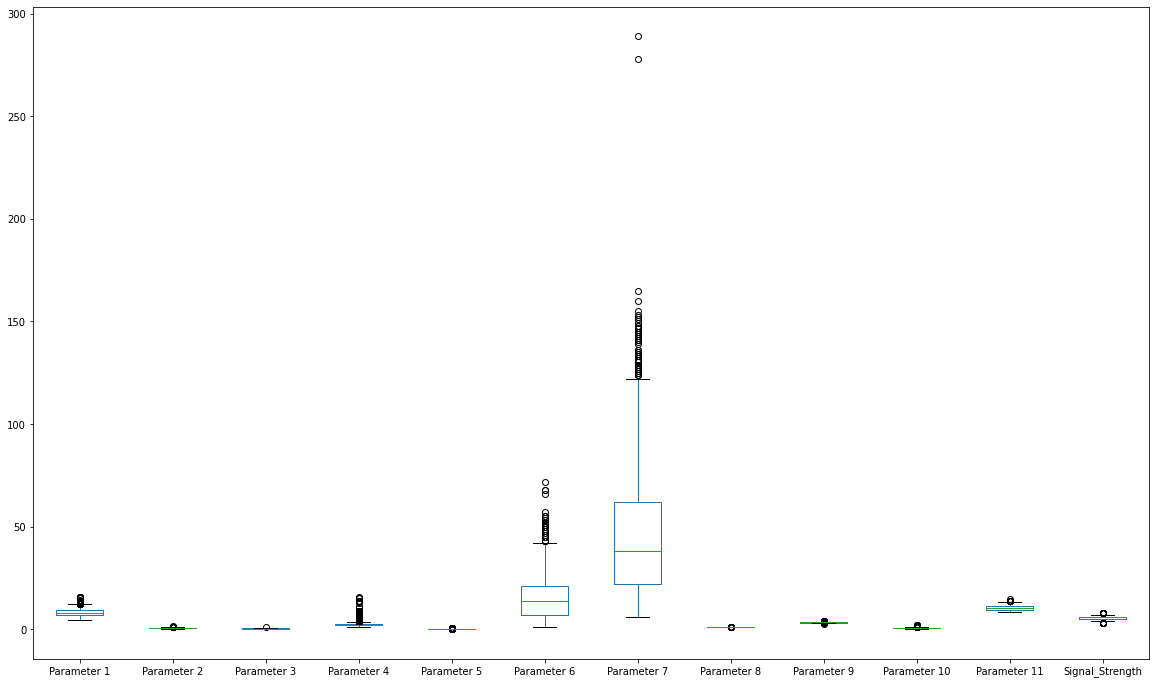

In [ ]:
#Boxplot
df.plot(kind='box' , figsize = (20,12) )

- All seems to have outliers, Parameter 7 has too many of them
- All are positively skewed

Lets replace the outliers with median values

In [6]:
#Outliers treatment
def treat_outlier(dFrame, col_name):
    median = dFrame[col_name].median()
    q1 = dFrame[col_name].quantile(0.25)
    q3 = dFrame[col_name].quantile(0.75)
    IQR = q3-q1 #Interquartile range
    lowVal  = q1 - 1.5*IQR
    highVal = q3 + 1.5*IQR
    dFrame.loc[(dFrame[col_name] < lowVal),col_name] = median
    dFrame.loc[(dFrame[col_name] > highVal),col_name] = median
    return dFrame


Since our dataset is small in size, we can't afford dropping them.

In [7]:
#Calling outlier remove function on df dataset
for col in df.columns:
    if(col != 'Signal_Strength'):
        df[col] = treat_outlier(df, col)
        
print("Shape:",df.shape)

Shape: (1599, 12)


- All outliers beyond the whisers are replaced with median
- Count of records are preserved

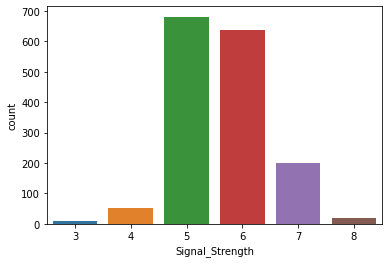

In [ ]:
#target class count plot
sns.countplot(df['Signal_Strength'])

 - 5,6 dominates the model

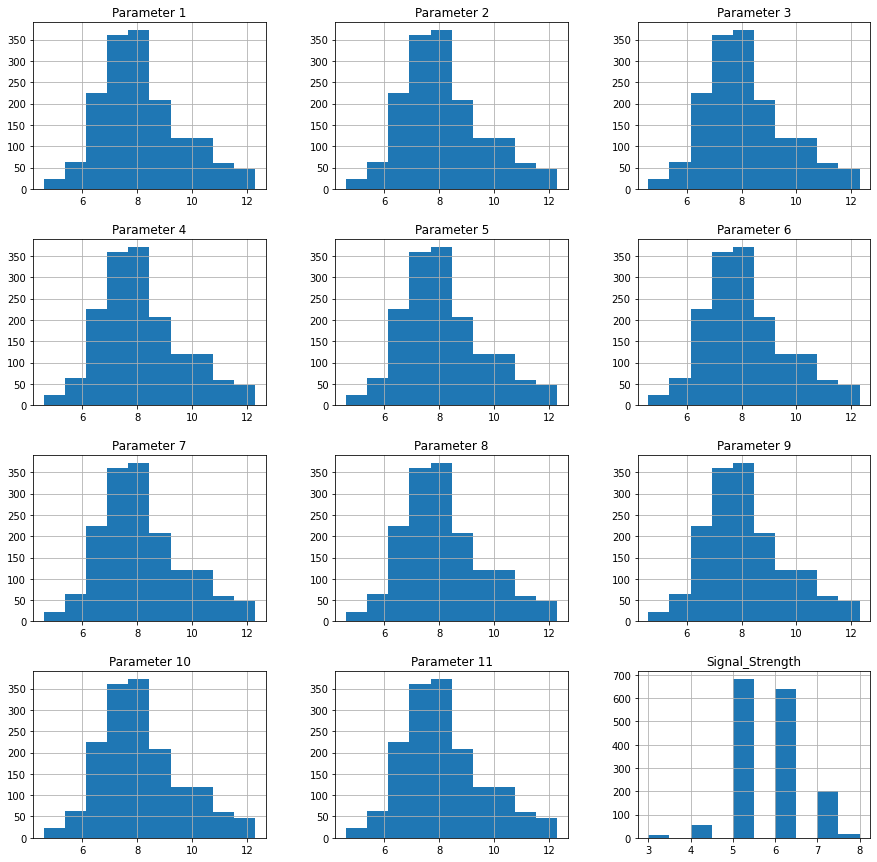

In [ ]:
#Histograms 
df.hist(figsize=(15,15))
plt.show()

- All are positively skewed
- Parameter 8,9 follows normal distribution

### Lets analyze the relationship among predictors

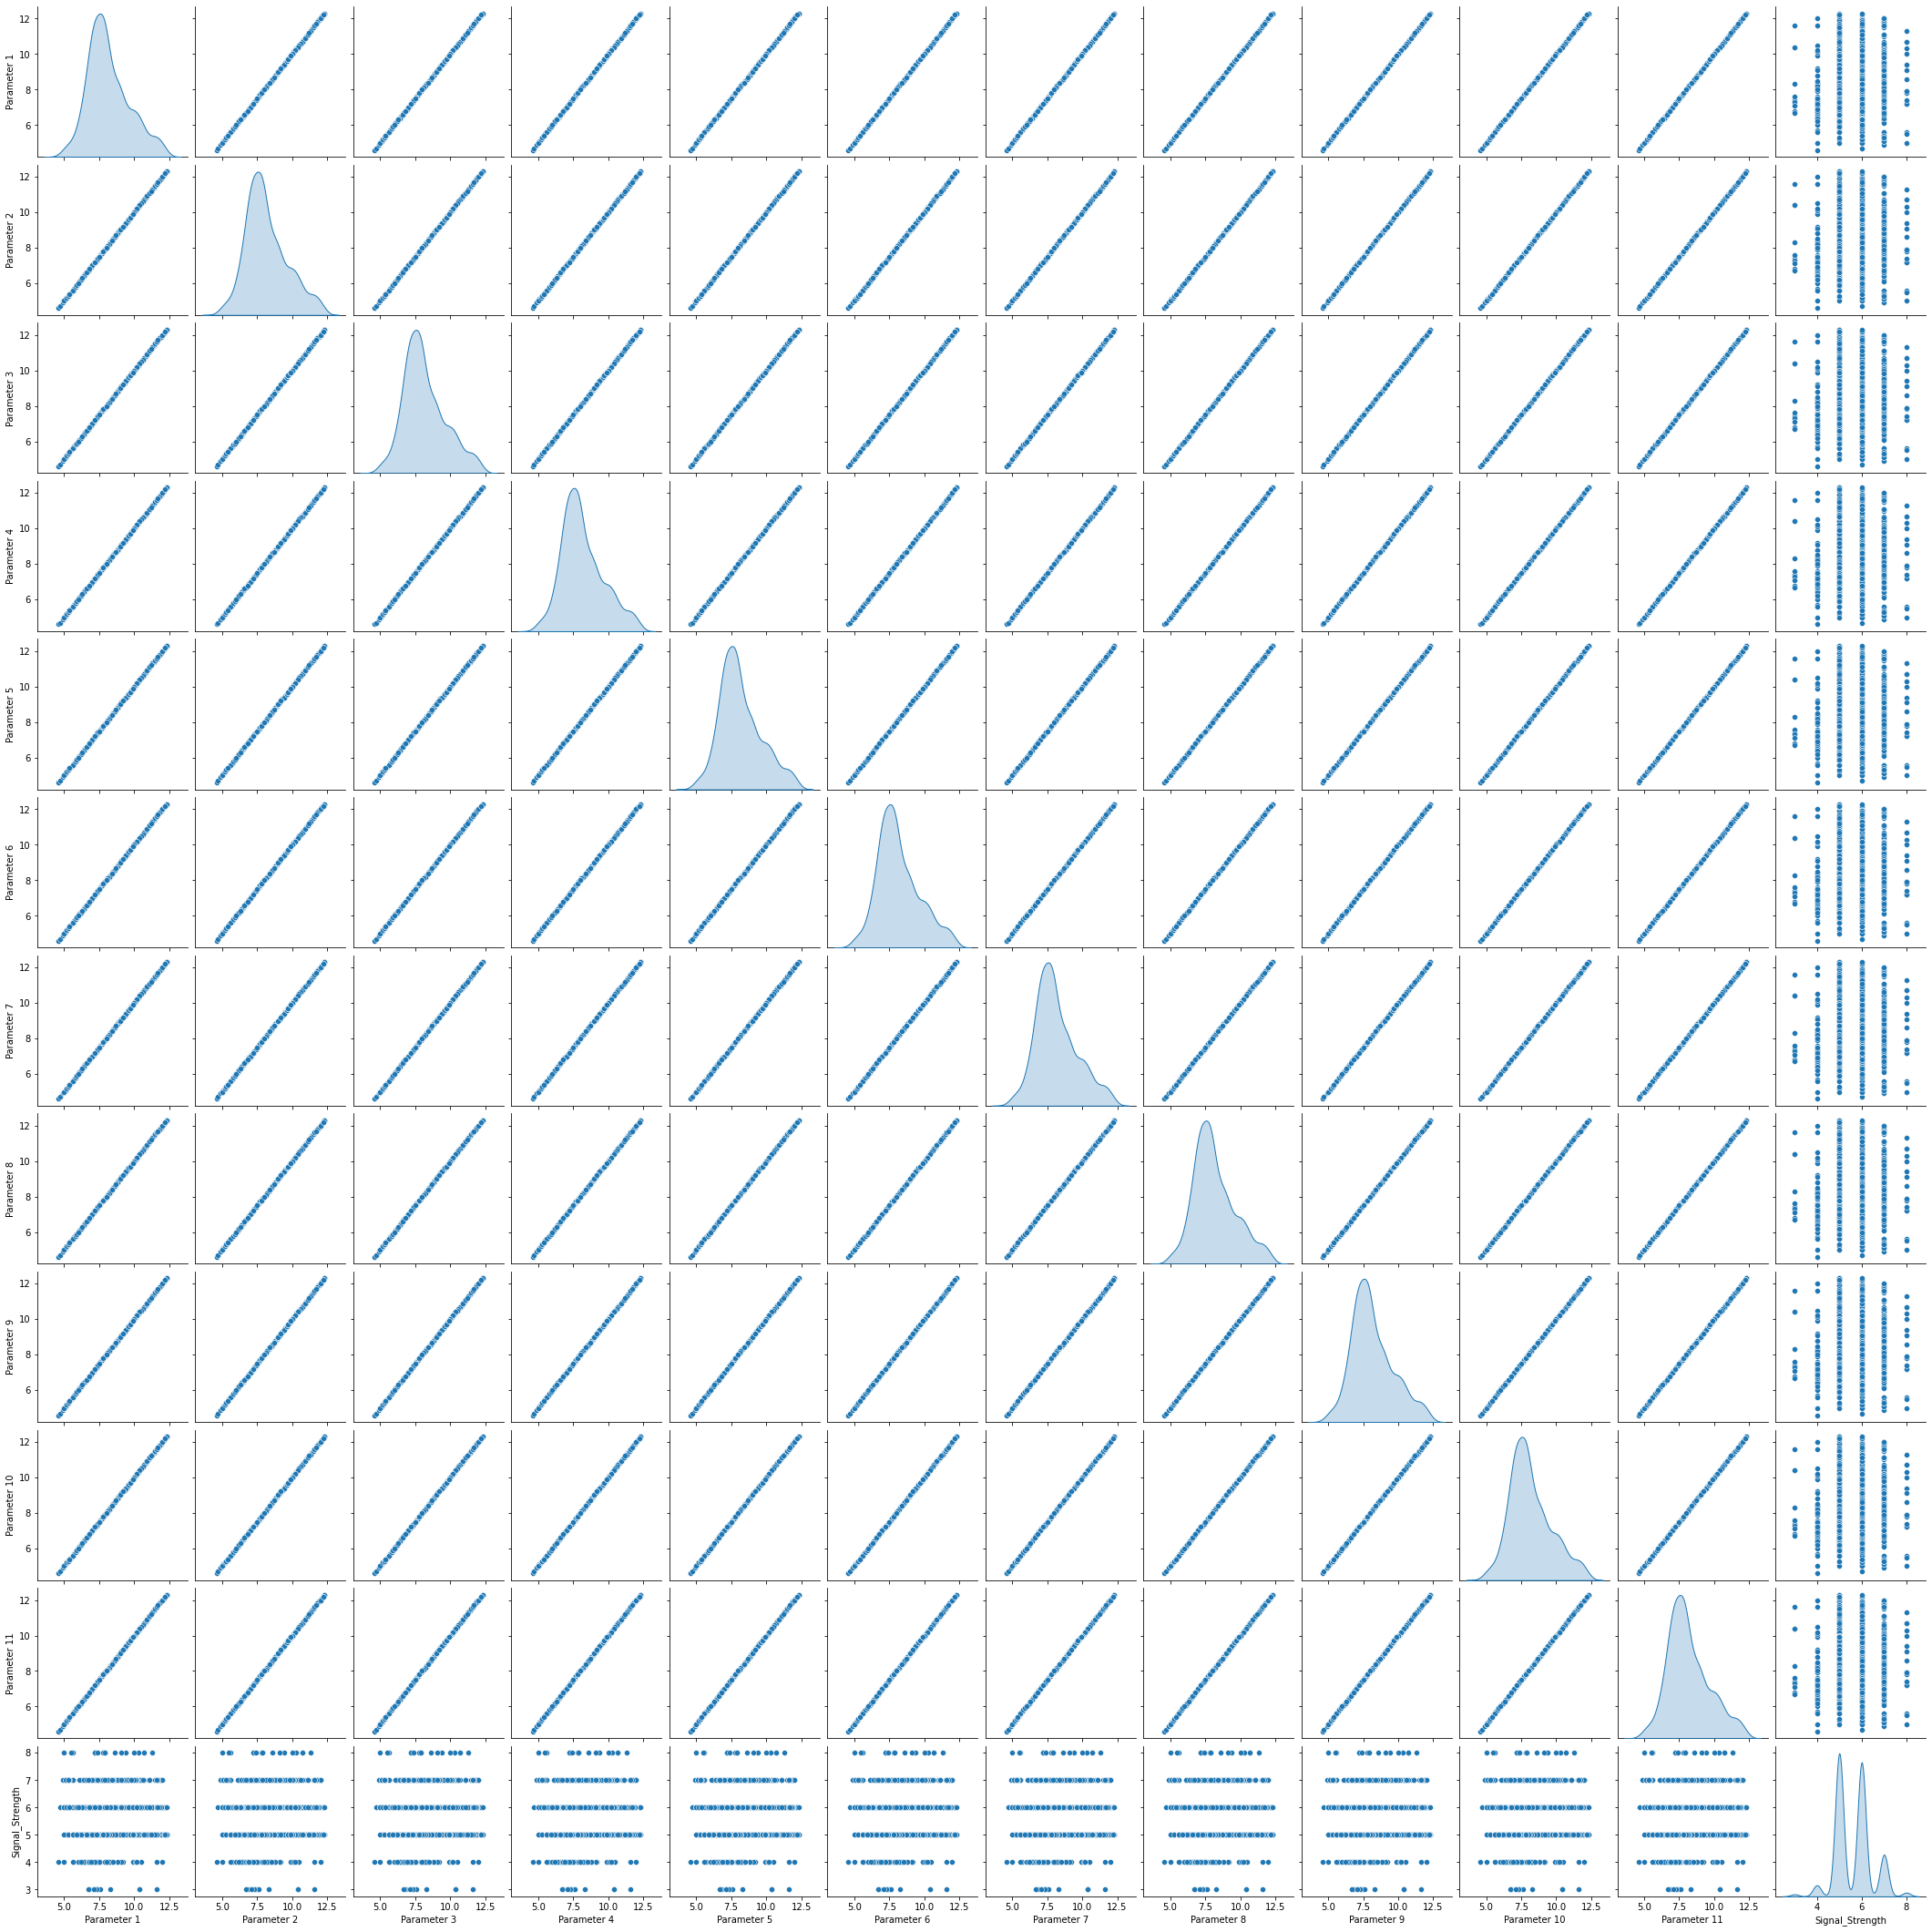

In [ ]:
#Pairplot
sns.pairplot(df,diag_kind='kde')

- As we see, except with target variable, all predictors themseleves has linear relationship

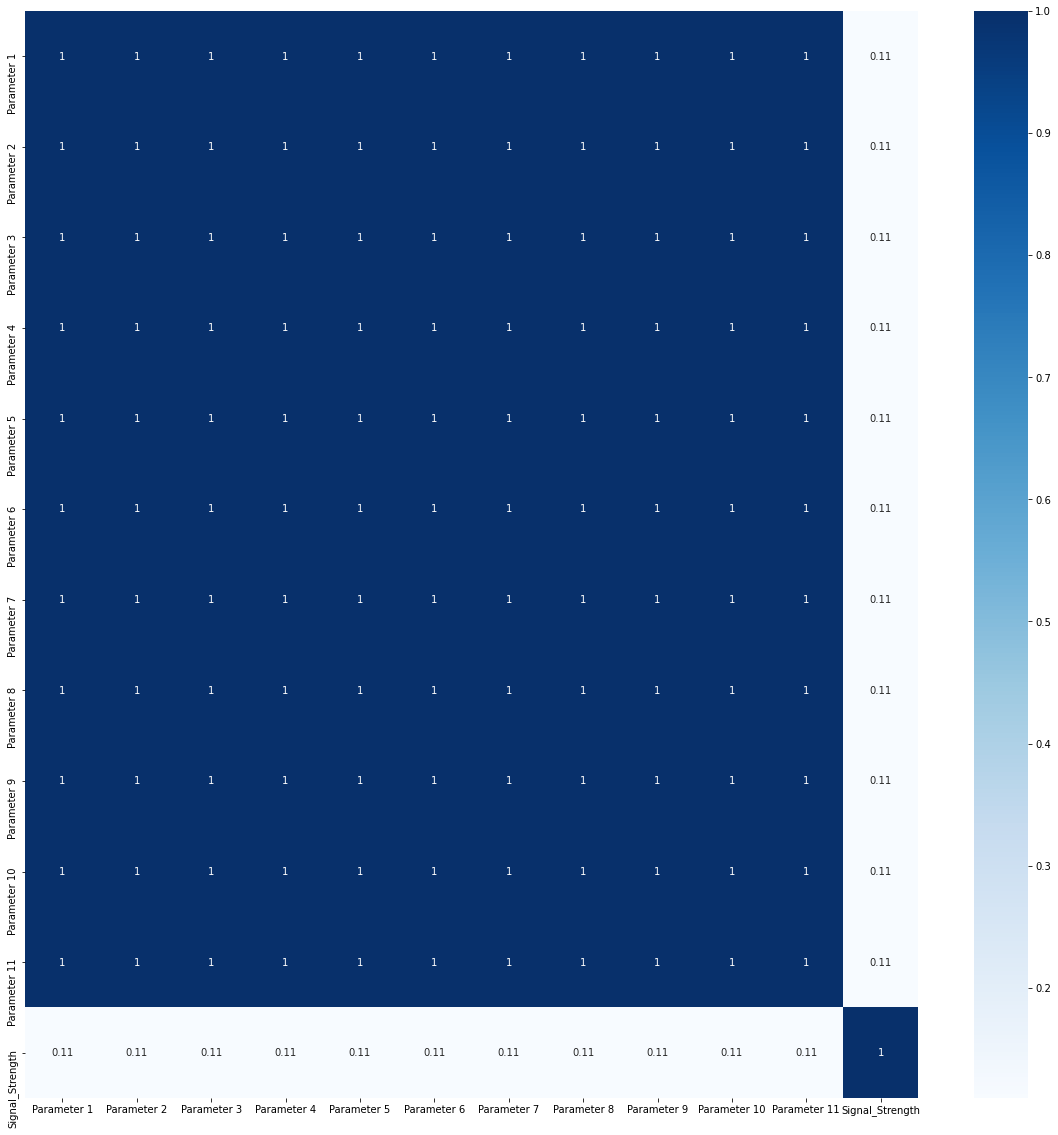

In [ ]:
#plotting the correlation 
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),ax=ax,annot=True,cmap='Blues')
plt.show()

- Correlation among predictors is 1. Highly correlated with each other

## 1.3. Design, train, tune and test a neural network regressor.

In [8]:
#Split the predictors vs target 
X = df.iloc[:,0:11].values 
y = df.iloc[:,11].values 
X.shape, y.shape


((1599, 11), (1599,))

In [11]:
# Splitting the dataset into the Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
 


In [ ]:
#Printing the dataset shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1119, 11)
(1119,)
(480, 11)
(480,)


In [12]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Creating Basic NN model

In [ ]:
# create model
model = Sequential()
model.add(Dense(11, input_shape = (11,),kernel_initializer='normal'))
model.add(Activation('relu'))
model.add(Dense(50,kernel_initializer='normal'))
model.add(Activation('relu'))
model.add(Dense(50,kernel_initializer='normal'))
model.add(Activation('relu'))
model.add(Dense(6,kernel_initializer='normal'))


In [ ]:
# Compiling the model
optimizer=keras.optimizers.SGD(lr=1e-4)
model.compile(loss='mse', optimizer=optimizer,metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 11)                132       
_________________________________________________________________
activation_69 (Activation)   (None, 11)                0         
_________________________________________________________________
dense_99 (Dense)             (None, 50)                600       
_________________________________________________________________
activation_70 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_100 (Dense)            (None, 50)                2550      
_________________________________________________________________
activation_71 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_101 (Dense)            (None, 6)               

In [ ]:
history = model.fit(X_train, y_train,epochs=100,batch_size=10)

Epoch 1/100
112/112 [==============================] - 0s 1ms/step - loss: 32.4958 - accuracy: 0.0492
Epoch 2/100
112/112 [==============================] - 0s 1ms/step - loss: 32.2478 - accuracy: 0.0751
Epoch 3/100
112/112 [==============================] - 0s 1ms/step - loss: 32.0008 - accuracy: 0.1671
Epoch 4/100
112/112 [==============================] - 0s 1ms/step - loss: 31.7548 - accuracy: 0.1671
Epoch 5/100
112/112 [==============================] - 0s 2ms/step - loss: 31.5102 - accuracy: 0.1752
Epoch 6/100
112/112 [==============================] - 0s 1ms/step - loss: 31.2669 - accuracy: 0.1903
Epoch 7/100
112/112 [==============================] - 0s 2ms/step - loss: 31.0249 - accuracy: 0.2073
Epoch 8/100
112/112 [==============================] - 0s 2ms/step - loss: 30.7840 - accuracy: 0.2207
Epoch 9/100
112/112 [==============================] - 0s 2ms/step - loss: 30.5439 - accuracy: 0.2484
Epoch 10/100
112/112 [==============================] - 0s 1ms/step - loss: 30.304

 As we see the loss came down to 0.6+ in 22nd epoch & stayed almost unaffected till 100 epochs.

In [ ]:
model.evaluate(X_train, y_train)

35/35 [==============================] - 0s 1ms/step - loss: 0.7354 - accuracy: 0.2502


[0.7353782653808594, 0.25022342801094055]

In [ ]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.2646


[0.6793091297149658, 0.2645833194255829]

- Train & test accuracy score are below par.
- Lets tune the model & see.

#### Loss vs Epochs

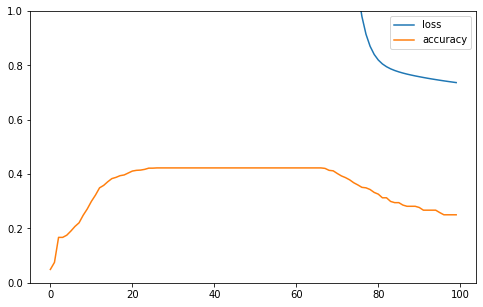

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.show()

- After 30 epochs, accuaracy is saturated for a while & started coming down. We will have to use CallBacks for early stopping
- Even though, loss is reduced , but there is no improvement in accuracy
- Train is 25%, test 26% score. Model is under fitting
- Lets hyper tune the model & find out the best model

### Hyper tuning the model

In [14]:
#Building the Base model using method
def build_model(n_hidden=3,n_neurons=30,learning_rate=3e-4,input_shape=[11]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
    model.add(keras.layers.Dense(6))
    optimizer=keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse',optimizer=optimizer)
    return model

#Calling the function
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test,y_test)
#Printing the score
mse_test


Epoch 1/100
35/35 [==============================] - 1s 5ms/step - loss: 32.2231 - val_loss: 31.1238
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 31.3178 - val_loss: 30.1793
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 30.3921 - val_loss: 29.2877
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 29.4978 - val_loss: 28.3690
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 28.5369 - val_loss: 27.3597
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 27.4595 - val_loss: 26.2031
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 26.2072 - val_loss: 24.8392
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 24.6889 - val_loss: 23.1438
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 22.8114 - val_loss: 21.1124
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 20.6040 - val_los

-0.6331374049186707

- We observed there's no much change in loss after 70+ epochs.

### Cross-validation using **RandomizedSearchCV**

In [ ]:
param_distibs = {
    "n_hidden": [0,1,2,3,4,5],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4,3e-2),
}

rnd_search_cv = RandomizedSearchCV (keras_reg,param_distibs,n_iter=10,cv=3)
rnd_search_cv.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[keras.callbacks.EarlyStopping(patience=10)],verbose=0)

12/12 [==============================] - 0s 2ms/step - loss: 0.6659


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fa74ebd9510>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa755f68190>,
                                        'n_hidden': [0, 1, 2, 3, 4, 5],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_t

- Loss is not coming down more than 0.6
- Accuracy isnt improving much too.

In [ ]:
#Best parameters
rnd_search_cv.best_params_

{'learning_rate': 0.0029983771280255793, 'n_hidden': 4, 'n_neurons': 49}

In [ ]:
#Best score
rnd_search_cv.best_score_

-0.6708454489707947

In [ ]:
#Saving the model with best params
best_model = rnd_search_cv.best_estimator_.model

In [ ]:
#Evaluate the Test set using saved model
best_model.evaluate(X_test,y_test)

15/15 [==============================] - 0s 1ms/step - loss: 0.6037


0.6036702394485474

### Since there is correlation 1 among all predictors. So lets just drop 10, and use only 1 of them for model

In [ ]:
#Split the predictors vs target 
X = df.iloc[:,0:1].values 
y = df.iloc[:,11].values 
print(X.shape)
print(y.shape)

# Splitting the dataset into the Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(1599, 1)
(1599,)


In [ ]:
#Building the Base model using method
def build_model(n_hidden=4,n_neurons=50,learning_rate=0.0023,input_shape=[1]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
    model.add(keras.layers.Dense(6))
    optimizer=keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse',optimizer=optimizer)
    return model

#Calling the function
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[keras.callbacks.EarlyStopping(patience=0.1)])
mse_test = keras_reg.score(X_test,y_test)
#Printing the score
mse_test

Epoch 1/100
35/35 [==============================] - 1s 5ms/step - loss: 30.9751 - val_loss: 28.3502
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 26.1714 - val_loss: 21.3752
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 13.7125 - val_loss: 3.7967
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 1.7678 - val_loss: 1.0330
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.9608 - val_loss: 0.8556
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.8405 - val_loss: 0.7810
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.7764 - val_loss: 0.7302
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.7399 - val_loss: 0.6947
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.7121 - val_loss: 0.6704
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6950 - val_loss: 0.6561
Epoc

-0.6250916719436646

In [ ]:
#Evaluate the Test set using saved model
keras_reg.score(X_test,y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.6178


-0.6177785992622375

- Not much change in score
- Since there is no much change in loss/score after 30+ epochs, so model is early stopped

## 4. Pickle the model for future use.

In [ ]:
# save the model
best_model.save('/tmp/best_model')

print("\nReload the pickled model")
Pickled_Load = keras.models.load_model('/tmp/best_model')

#Predcting the scores using Loaded Model
print(Pickled_Load.evaluate(X_train,y_train))
print(Pickled_Load.evaluate(X_test,y_test))

INFO:tensorflow:Assets written to: /tmp/best_model/assets

Reload the pickled model
35/35 [==============================] - 0s 1ms/step - loss: 0.6533
0.6532703042030334
15/15 [==============================] - 0s 2ms/step - loss: 0.6058
0.6057811975479126


# Conclusions
1. **Target class has range within 3-8 & not continous. So regression is not good model on such data.**
2. Classifier would be more appropriate
3. Even after hyper tuning, our model is still under-fitting
4. Loss is less & but the accuracy is below par
5. Predictors are highly correlated which means they all are doing similar job, so can't expect good scoring model.
6. Dataset size is less, preprocessed well. Has no null values.
7. Dataset is not sufficient enough to build good ANN model.
8. No change in loss after 20+ spochs & loss is kinda saturated there
9. Linear Regression ML model would have done good enough with this dataset

# **Part-2**

## 2.1. Import the data.

Data is shared via hdf5 format, so Lets open it as file & load using keys.

In [ ]:
filename = "/content/gdrive/MyDrive/Colab Notebooks/8. Deep Learning/Project/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    X_test = f.get('X_test')
    X_test = np.array(X_test)
    X_train = f.get('X_train')
    X_train = np.array(X_train)
    X_val = f.get('X_val')
    X_val = np.array(X_val)
    y_test = f.get('y_test')
    y_test = np.array(y_test)
    y_train = f.get('y_train')
    y_train = np.array(y_train)
    y_val = f.get('y_val')
    y_val = np.array(y_val)


f.close() 


Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


As we can see there are 6 keys, for training, validating, and testing sets.

In [ ]:
#Printing the shapes of all datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


- We have more images for validation than trainig the model. 
- Have sufficient enough to build good NN model

## 2.2. Data pre-processing and visualisation.

Label: 8


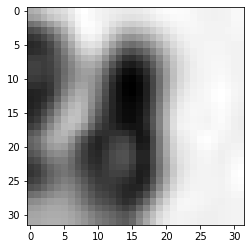

In [ ]:
#Lets print one sample image & its corresponding label
print("Label: {}".format(y_train[9999]))
plt.imshow(X_train[9999], cmap='gray')

- We seem to have very thin & diluted edges

### Reshape train and test sets into compatible shapes

Sequential model in tensorflow.keras expects data to be in the format n_e, n_h, n_w, n_c)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1)

### Normalize data

In [ ]:
# Normaization i.e dividing the RGB codes with 255 (which is the maximum RGB code 255 minus the minimum RGB code 0)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255

In [ ]:
#Lets print the new shapes  & no.images
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Images in X_val:", X_val.shape[0])

print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())


X_train shape: (42000, 32, 32, 1)
Images in X_train: 42000
Images in X_test: 18000
Images in X_val: 60000
Max value in X_train: 0.9999
Min value in X_train: 0.0


### One-hot encode the class vector

In [ ]:
#In order to use categorical_crossentropy as loss
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (42000, 10)
One value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


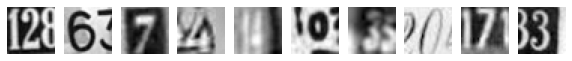

In [ ]:
#Lets print 10 samples of training set & respective labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()


In [ ]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))

## 2.3. Design, train, tune and test a neural network image classifier.

In [ ]:
#Basic NN classifier model

#Model intialization
model = Sequential()
#input as 32*32=1024
model.add(Dense(50, input_shape = (1024, )))
#Activation function as ReLu
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))

#Last Output layer with Activation function as Softmax
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = keras.optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
#Printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                51250     
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2

- We have good no.of trainable parameters
- Since there is no Dropout, we have no on-trainable for now.

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
1313/1313 [==============================] - 6s 4ms/step - loss: 2.2905 - accuracy: 0.1423 - val_loss: 2.2652 - val_accuracy: 0.1875
Epoch 2/50
1313/1313 [==============================] - 5s 3ms/step - loss: 2.1643 - accuracy: 0.2348 - val_loss: 2.0312 - val_accuracy: 0.2588
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 1.8479 - accuracy: 0.3385 - val_loss: 1.7097 - val_accuracy: 0.3951
Epoch 4/50
1313/1313 [==============================] - 4s 3ms/step - loss: 1.6703 - accuracy: 0.4156 - val_loss: 1.7527 - val_accuracy: 0.3736
Epoch 5/50
1313/1313 [==============================] - 5s 4ms/step - loss: 1.5351 - accuracy: 0.4799 - val_loss: 1.7916 - val_accuracy: 0.3795
Epoch 6/50
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3993 - accuracy: 0.5391 - val_loss: 1.3599 - val_accuracy: 0.5508
Epoch 7/50
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2820 - accuracy: 0.5843 - val_loss: 1.2957 - val_accuracy:

#### Printing all accuracy details

In [ ]:
print("Test accuracy",(model.evaluate(X_test, y_test,verbose=0)[1]))
print("Train accuracy",model.evaluate(X_train, y_train,verbose=0)[1])
print("Val accuracy",model.evaluate(X_val, y_val,verbose=0)[1])

Test accuracy 0.7710000276565552
Train accuracy 0.7949285507202148
Val accuracy 0.7877500057220459


- Model has done decent job with just 50 epochs. Lets **tune all the hyperparameters** to find out which is best for the model in the later part.
- Model well performed on new data set(Test as well)

## 2.4 Plot the loss vs number of epochs

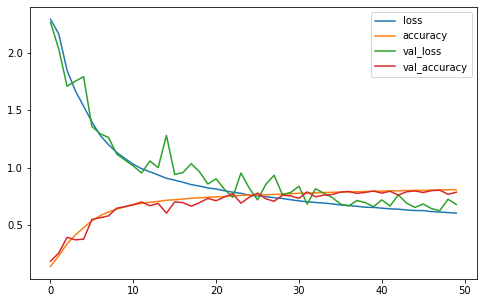

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

- Loss is going down & accuracy is up with no.of epochs
- Val loss is not as smmoth as training loss
- There is slight spike in unwanted direction between 15 & 20 epochs
- We will find out whats the best number for epochs while tuning

#### Lets see how our model predicted.

Predicted label: 3
Softmax Outputs: [[0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.  ]]
1.0000001


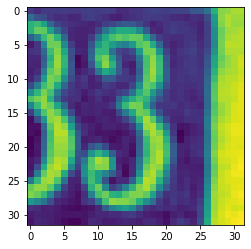

In [ ]:
#Random image & its label
plt.imshow(X_train[9].reshape(32, 32))
y_pred = model.predict(X_train[9].reshape(1,1024))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred.round(2))
print(y_pred.sum())

 This image has somewhat clear boundaries & we did good job.

Predicted label: 8
Softmax Outputs: [[0.02 0.   0.   0.01 0.   0.01 0.03 0.   0.92 0.01]]
1.0000001


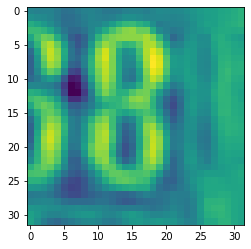

In [ ]:
#lets try another prediction
plt.imshow(X_test[77].reshape(32, 32))
y_pred = model.predict(X_test[77].reshape(1,1024))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred.round(2))
print(y_pred.sum())

This image has little thin boundary than previous one. Still our model has predicted well.

Predicted label: 7
Softmax Outputs: [[0.   0.18 0.3  0.01 0.   0.   0.   0.51 0.   0.  ]]
0.99999994


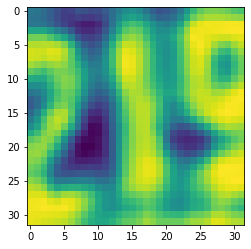

In [ ]:
#Little blurred image
plt.imshow(X_test[999].reshape(32, 32))
y_pred = model.predict(X_test[999].reshape(1,1024))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred.round(2))
print(y_pred.sum())

- Model has slightly predicted 18% as 1
- Image has thick features elsehwere, so model is unable to fingure out.

Predicted label: 5
Softmax Outputs: [[0.   0.   0.   0.04 0.   0.68 0.09 0.   0.18 0.  ]]
1.0


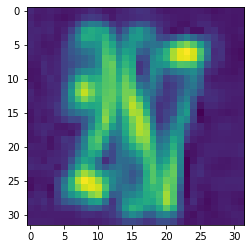

In [ ]:
#Lets try even worse image
plt.imshow(X_test[7].reshape(32, 32))
y_pred = model.predict(X_test[7].reshape(1,1024))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred.round(2))
print(y_pred.sum())

- Observe the thick lines of the image, somewhat looks like 5.
- Our model is failed to identify the lighter pixes as features.
- So lets predict the same images with out best model after tuning

## Hyper Tuning the model

**1. Batch Size & No.of Epochs**

In [ ]:

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(50, input_shape = (1024,)))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train, validation_data=(X_val,y_val))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.790881 using {'batch_size': 20, 'epochs': 100}
0.671619 (0.021865) with: {'batch_size': 10, 'epochs': 10}
0.773929 (0.003074) with: {'batch_size': 10, 'epochs': 50}
0.782929 (0.005606) with: {'batch_size': 10, 'epochs': 100}
0.661071 (0.011407) with: {'batch_size': 20, 'epochs': 10}
0.781905 (0.005541) with: {'batch_size': 20, 'epochs': 50}
0.790881 (0.009634) with: {'batch_size': 20, 'epochs': 100}
0.518357 (0.070168) with: {'batch_size': 40, 'epochs': 10}
0.755119 (0.003015) with: {'batch_size': 40, 'epochs': 50}
0.777952 (0.013686) with: {'batch_size': 40, 'epochs': 100}
0.439381 (0.071964) with: {'batch_size': 60, 'epochs': 10}
0.730119 (0.010545) with: {'batch_size': 60, 'epochs': 50}
0.774190 (0.008115) with: {'batch_size': 60, 'epochs': 100}
0.384833 (0.042054) with: {'batch_size': 80, 'epochs': 10}
0.731762 (0.005387) with: {'batch_size': 80, 'epochs': 50}
0.759405 (0.012165) with: {'batch_size': 80, 'epochs': 100}
0.288595 (0.062995) with: {'batch_size': 100, 'epochs':

**2. Training Optimization Algorithm**

In [ ]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(50, input_shape = (1024,)))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad',  'Adam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.786976 using {'optimizer': 'SGD'}
0.786976 (0.010395) with: {'optimizer': 'SGD'}
0.124357 (0.031827) with: {'optimizer': 'RMSprop'}
0.600738 (0.024048) with: {'optimizer': 'Adagrad'}
0.102310 (0.001263) with: {'optimizer': 'Adam'}


**3. Dropout Rate**

In [ ]:
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0):
    # create model
    model = Sequential()
    model.add(Dense(50, input_shape = (1024,)))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)
# define the grid search parameters
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.803857 using {'dropout_rate': 0.3}
0.794405 (0.011010) with: {'dropout_rate': 0.0}
0.799643 (0.006878) with: {'dropout_rate': 0.1}
0.798786 (0.004671) with: {'dropout_rate': 0.2}
0.803857 (0.004001) with: {'dropout_rate': 0.3}
0.800571 (0.005376) with: {'dropout_rate': 0.4}
0.794071 (0.007734) with: {'dropout_rate': 0.5}


**4. Activation Function**

In [ ]:
# Use scikit-learn to grid search the activation function
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=1024, kernel_initializer='uniform', activation=activation))
    model.add(Dense(10, kernel_initializer='uniform', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=20, verbose=0)
# define the grid search parameters
activation = ['relu', 'tanh', 'sigmoid']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.758548 using {'activation': 'relu'}
0.758548 (0.009865) with: {'activation': 'relu'}
0.720000 (0.013061) with: {'activation': 'tanh'}
0.383262 (0.016569) with: {'activation': 'sigmoid'}


**5. No.of Neurons**

In [ ]:
# Function to create model, required for KerasClassifier
def create_model(neurons):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_shape = (1024,)))
    model.add(Activation('relu'))
    model.add(Dense(neurons))
    model.add(Activation('relu'))
    model.add(Dense(neurons))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.744619 using {'neurons': 30}
0.099643 (0.002610) with: {'neurons': 1}
0.340786 (0.089139) with: {'neurons': 5}
0.592786 (0.024065) with: {'neurons': 10}
0.663333 (0.019642) with: {'neurons': 15}
0.709524 (0.015819) with: {'neurons': 20}
0.725595 (0.005405) with: {'neurons': 25}
0.744619 (0.010487) with: {'neurons': 30}


## Using Best Params

In [ ]:
#Model intialization
#Since score is going highas no.of neurons increasing,lets keep n=50
model = Sequential()
#input as 32*32=1024
model.add(Dense(50, input_shape = (1024, )))
#Activation function as ReLu
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))

#Last Output layer with Activation function as Softmax
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = keras.optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, batch_size=20, epochs=100, validation_data=(X_val, y_val),callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
2100/2100 [==============================] - 10s 4ms/step - loss: 2.2645 - accuracy: 0.1473 - val_loss: 2.1493 - val_accuracy: 0.2055
Epoch 2/100
2100/2100 [==============================] - 7s 3ms/step - loss: 2.0412 - accuracy: 0.2620 - val_loss: 1.8338 - val_accuracy: 0.3765
Epoch 3/100
2100/2100 [==============================] - 9s 4ms/step - loss: 1.6509 - accuracy: 0.4356 - val_loss: 1.5224 - val_accuracy: 0.4722
Epoch 4/100
2100/2100 [==============================] - 9s 4ms/step - loss: 1.4117 - accuracy: 0.5267 - val_loss: 1.3210 - val_accuracy: 0.5801
Epoch 5/100
2100/2100 [==============================] - 7s 3ms/step - loss: 1.2886 - accuracy: 0.5764 - val_loss: 1.2432 - val_accuracy: 0.6007
Epoch 6/100
2100/2100 [==============================] - 9s 4ms/step - loss: 1.1984 - accuracy: 0.6135 - val_loss: 1.1675 - val_accuracy: 0.6171
Epoch 7/100
2100/2100 [==============================] - 7s 3ms/step - loss: 1.1253 - accuracy: 0.6410 - val_loss: 1.0222 - val_a

In [ ]:
print("Test accuracy",(model.evaluate(X_test, y_test,verbose=0)[1]))
print("Train accuracy",model.evaluate(X_train, y_train,verbose=0)[1])
print("Val accuracy",model.evaluate(X_val, y_val,verbose=0)[1])

Test accuracy 0.8067222237586975
Train accuracy 0.8631904721260071
Val accuracy 0.8462499976158142


- Decent score on new data (Test)

### Loss vs Epochs

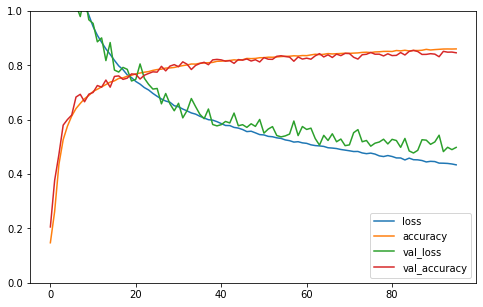

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.show()

## Lets try on incorrectly predicted images using last model

Predicted label: 1
Softmax Outputs: [[0.   0.93 0.01 0.   0.03 0.   0.01 0.   0.   0.  ]]
1.0000001


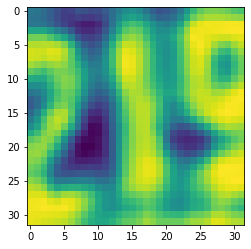

In [ ]:
#Little blurred image
plt.imshow(X_test[999].reshape(32, 32))
y_pred = model.predict(X_test[999].reshape(1,1024))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred.round(2))
print(y_pred.sum())

- Yep, thats better now

Predicted label: 5
Softmax Outputs: [[0.   0.   0.   0.33 0.   0.43 0.03 0.   0.19 0.01]]
1.0


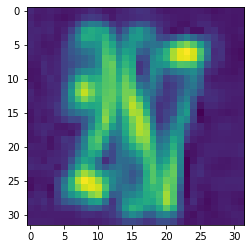

In [ ]:
#Lets try even worse image
plt.imshow(X_test[7].reshape(32, 32))
y_pred = model.predict(X_test[7].reshape(1,1024))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred.round(2))
print(y_pred.sum())

- Incorrect still.

### Pickling the Model

In [ ]:
# save the model
model.save('/tmp/best_model2')

print("\nReload the pickled model")
Pickled_Load2 = keras.models.load_model('/tmp/best_model2')

#Predcting the scores using Loaded Model
print(Pickled_Load2.evaluate(X_train,y_train))
print(Pickled_Load2.evaluate(X_test,y_test))

INFO:tensorflow:Assets written to: /tmp/best_model2/assets

Reload the pickled model
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4207 - accuracy: 0.8632
[0.4207160472869873, 0.8631904721260071]
563/563 [==============================] - 1s 1ms/step - loss: 0.6790 - accuracy: 0.8067
[0.6789517998695374, 0.8067222237586975]


# Observations

- Model is able to predict the images with clear boundaries
- Model struggling with blurred images.
- After tuning, best model is working better predicting blurred images upto some extent.
- When there are too thin/mixed boundaries, model is still struggling. 
- Still model performed well on new data 62k images with 80% score. 
- CNN would work better in such cases. Because once CNN detects edge/feature, it can detect anywhere in the new image. This case, our model is failing to do so.